## Patient's Condition Classification Using Drug Reviews

In [1]:
#Importing the neccessary packages needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the given dataset
df=pd.read_excel("drugsCom_raw (2).xlsx")
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [3]:
df.shape

(161297, 7)

* The given drugsCom_raw dataset contains 7 columns and 161297 rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


* Out of 7 columns , the Unnamed:0, rating and usefulCount are of Numeric data type.
* drugName,condition and review are of object data type.
* And the date column is of type datatime.

In [5]:
# Dropping the Unnamed:0 column as it is not useful for our further analysis
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(161297, 6)

In [6]:
#Checking all the columns 
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [7]:
## Checking few important factors to understand the column behaviors
df.describe().T

,count,mean,min,25%,50%,75%,max,std
rating,161297.0,6.994377,1.0,5.0,8.0,10.0,10.0,3.272329
date,161297,2014-06-11 08:51:43.779983360,2008-02-24 00:00:00,2012-04-12 00:00:00,2015-06-09 00:00:00,2016-08-19 00:00:00,2017-12-12 00:00:00,NaN
usefulCount,161297.0,28.004755,0.0,6.0,16.0,36.0,1291.0,36.403742


#### rating:
* By looking at the above values we can draw our insigts like the rating column is right skewed as we can see the median is 8 which is higher than the mea,so most of the patients has given higher ratings.
* High standard deviation (~3.27) implies a wide spread of patient satisfaction.
#### date:
* By looking at the min and max values we can say that,the dataset contains almost 10 years of data, and also starts with 2008 to 2017.
* This feild is useful to do the trend analysis.
#### usefulCount
* Most reviews are moderately useful (median = 16), but some are extremely helpful (max = 1291).
* The long right tail suggests a few very influential reviews dominate.

In [8]:
#Checking the null values
df.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

* Only the condition column contains some null values ,apart from that no other columns contains "null" values 
* As we are considering only 3 specific conditions going forward ,further I am not dealing with those null values.

In [9]:
# Filter relevant conditions
df = df[df['condition'].isin(['Depression', 'High Blood Pressure', 'Diabetes, Type 2'])]
df.shape

(13944, 6)

* I have taken only 'Depression', 'High Blood Pressure', 'Diabetes, Type 2' conditions from the dataset.
* The shape of the dataset has been reduced and now contains only 13944 rows for the 3 relavant condition given.

In [10]:
#Checking the null values
df.isnull().sum()

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

* So now there are no null values to further deal with.


In [11]:
#Check for duplicates 
df.duplicated().sum()

0

* No duplicate values present in the dataset.

#### Visualization 

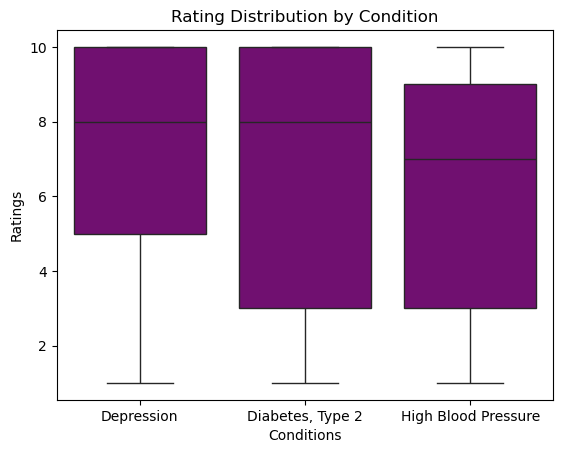

In [12]:
## Lets draw some visuals to understand more on the data

## let us understand the data distribution using the boxplot
sns.boxplot(data=df, x='condition', y='rating', color='purple')
plt.title("Rating Distribution by Condition")
plt.xlabel("Conditions")
plt.ylabel("Ratings")
plt.show()

* We can infer by looking at the above box plots that there is no presence of outliers,as we know that the rating ranges from (1-10).
* And also all the conditions are left-skewed as the ratings values are higher.

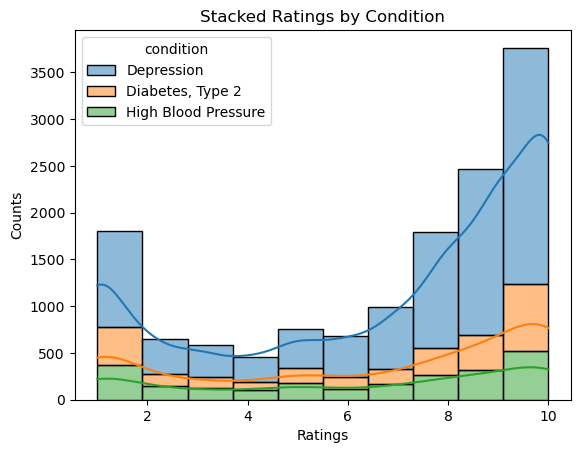

In [13]:
## let us understand the data distribution using the histplot 
sns.histplot(data=df, x='rating', hue='condition', multiple='stack', bins=10, kde =True)
plt.title("Stacked Ratings by Condition")
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.show()

* So we can see from the above histplot that, how much each condition contributed to the total count in each rating bins.

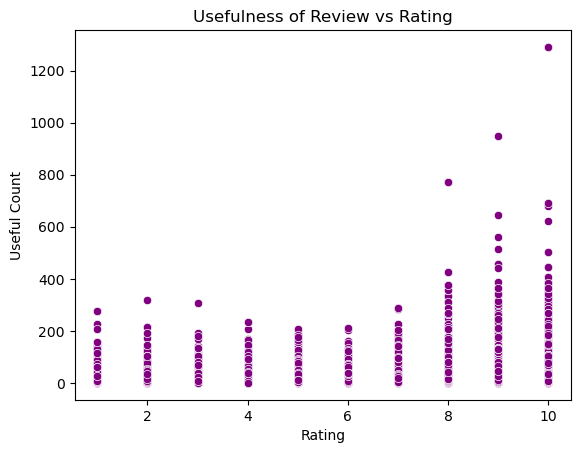

In [14]:
# Scatter Plots
sns.scatterplot(data=df, x='rating', y='usefulCount',color="purple")
plt.title("Usefulness of Review vs Rating")
plt.xlabel("Rating")
plt.ylabel("Useful Count")
plt.show()

* By looking at the relationship between the usefulCount and Rating we can say that most of the people have experianced positively and given the good ratings on the drugs.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12384\4163400307.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['rating'].mean().plot(figsize=(12, 5),color="purple")


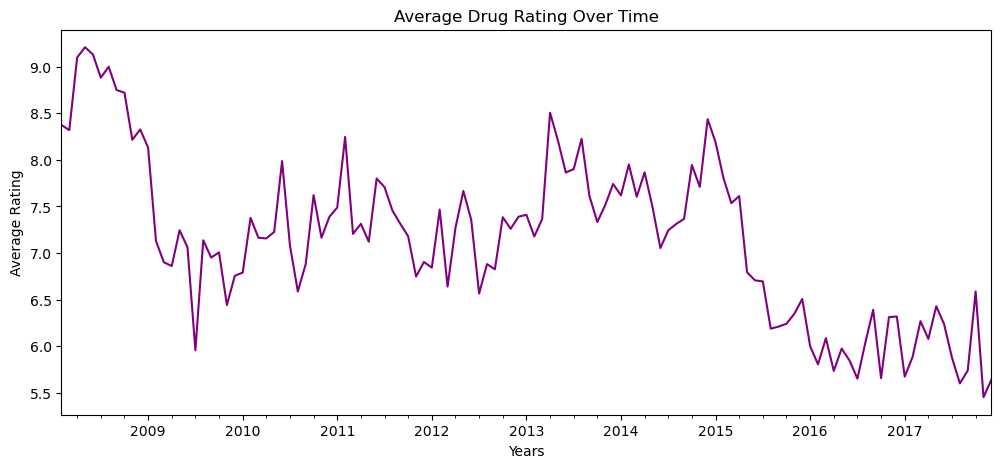

In [15]:
#Analyse the trend over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date').resample('M')['rating'].mean().plot(figsize=(12, 5),color="purple")
plt.title("Average Drug Rating Over Time")
plt.ylabel("Average Rating")
plt.xlabel("Years")
plt.show()

* We can see the average ratings given by the patients over the time.

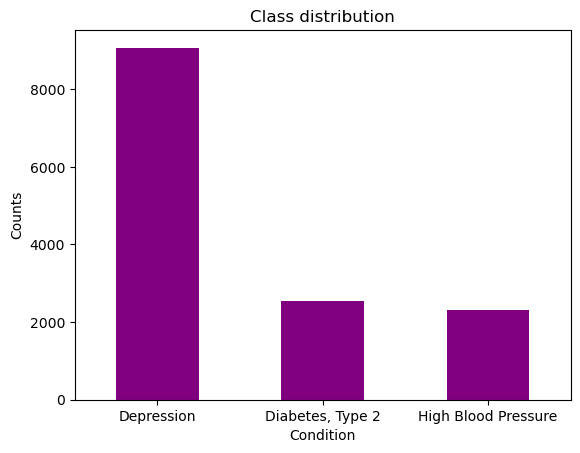

In [16]:
#Bar chart to analyse the individual count of each condition
df['condition'].value_counts().plot(kind='bar',color="purple")  
plt.title("Class distribution")
plt.xlabel("Condition")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

In [17]:
# Count number of reviews for each drug and get the top 10
top_drugs = df['drugName'].value_counts().head(10)

# Display the result
print(top_drugs)

drugName
Bupropion         549
Sertraline        459
Venlafaxine       437
Pristiq           418
Desvenlafaxine    414
Citalopram        388
Escitalopram      380
Vortioxetine      345
Duloxetine        328
Vilazodone        315
Name: count, dtype: int64


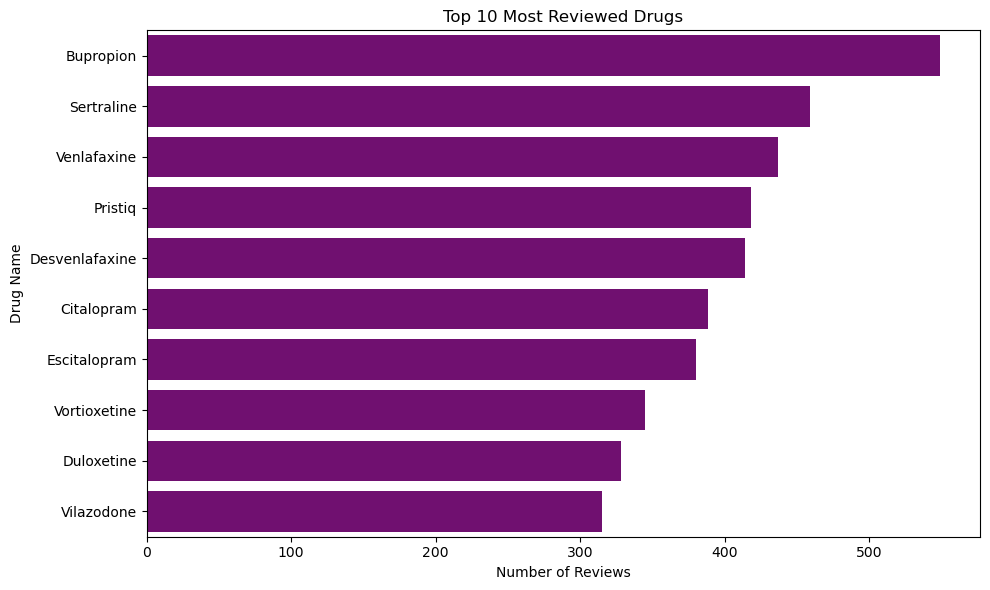

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, color='purple')  # Solid purple color
plt.title("Top 10 Most Reviewed Drugs")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Standardize numerical features
scaler = StandardScaler()
df[['rating', 'usefulCount']] = scaler.fit_transform(df[['rating', 'usefulCount']])

# Label encode 'condition'
le = LabelEncoder()
df['condition_encoded'] = le.fit_transform(df['condition'])

In [20]:
df

,drugName,condition,review,rating,date,usefulCount,condition_encoded
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",0.978204,2017-03-09,0.159560,0
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",0.354558,2011-05-07,-0.825362,0
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",-0.892735,2016-04-27,-0.825362,0
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",0.978204,2017-10-24,-0.419806,1
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",0.978204,2013-06-20,2.322525,0
...,...,...,...,...,...,...,...
161251,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",-0.892735,2009-07-15,-0.130123,2
161258,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",-1.828204,2009-07-18,-0.400494,2
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",0.666381,2015-10-23,0.024374,1
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",-1.516381,2016-07-17,-0.245996,0


In [21]:
df['condition_encoded'].value_counts()

condition_encoded
0    9069
1    2554
2    2321
Name: count, dtype: int64

* We can see the individual counts for Depression, Diabetes Type2 and High Blood Pressure as 0,1 and 2 respectively.

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources
#nltk.download('punkt')        #Split the text into sentences or words         
#nltk.download('stopwords')    #Remove stopwords 
nltk.download('wordnet')


stop_words = set(stopwords.words('english'))  # Set of English stopwords
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()     # Convert the text into lowercase 
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters, numbers, punctuation (keep only words)
    tokens = word_tokenize(text)  # Tokenize
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords + Lemmatize
    cleaned_text = ' '.join(filtered_tokens)  # Join back to string (optional: keep as tokens if needed for modeling)
    return cleaned_text


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df['cleaned_review'] = df['review'].apply(clean_text)
df.head(10)

,drugName,condition,review,rating,date,usefulCount,condition_encoded,cleaned_review
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",0.978204,2017-03-09,0.159560,0,taken antidepressant year improvement mostly m...
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",0.354558,2011-05-07,-0.825362,0,week zoloft anxiety mood swing take mg morning...
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",-0.892735,2016-04-27,-0.825362,0,gp started venlafaxine yesterday help depressi...
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",0.978204,2017-10-24,-0.419806,1,hey guy month since last post wanted give mont...
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",0.978204,2013-06-20,2.322525,0,medicine saved life wit end antidepressant rea...
81,Wellbutrin,Depression,"""Started taking it and I slept well at night a...",-0.892735,2017-01-13,-0.593616,0,started taking slept well night awoke early ar...
96,Aripiprazole,Depression,"""Intake Effexor XR 375 mg, and lorazepam for d...",-0.892735,2012-08-17,-0.245996,0,intake effexor xr mg lorazepam depression anxi...
104,Amlodipine / olmesartan,High Blood Pressure,"""My blood pressure has been around 160/100. Do...",0.978204,2015-01-19,-0.690177,2,blood pressure around doctor prescribed azor h...
143,Desvenlafaxine,Depression,"""This medication is amazing! After 3 days of b...",0.978204,2013-03-10,1.067232,0,medication amazing day extremely sick started ...
146,Dulaglutide,"Diabetes, Type 2","""I was recently referred to a endocrinologist ...",0.666381,2015-11-05,-0.651552,1,recently referred endocrinologist started trul...


In [24]:
#!pip install textblob

from textblob import TextBlob

# Apply sentiment analysis
df['polarity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# View results
df[['review', 'polarity']].head()

,review,polarity
11,"""I have taken anti-depressants for years, with...",0.275000
31,"""1 week on Zoloft for anxiety and mood swings....",0.166667
44,"""my gp started me on Venlafaxine yesterday to ...",-0.136508
50,"""Hey Guys, It&#039;s been 4 months since my l...",0.103571
67,"""This medicine saved my life. I was at my wits...",0.168194


In [25]:
def get_sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(get_sentiment_label)
df[['review', 'polarity', 'sentiment']].head()


,review,polarity,sentiment
11,"""I have taken anti-depressants for years, with...",0.275000,Positive
31,"""1 week on Zoloft for anxiety and mood swings....",0.166667,Positive
44,"""my gp started me on Venlafaxine yesterday to ...",-0.136508,Negative
50,"""Hey Guys, It&#039;s been 4 months since my l...",0.103571,Positive
67,"""This medicine saved my life. I was at my wits...",0.168194,Positive


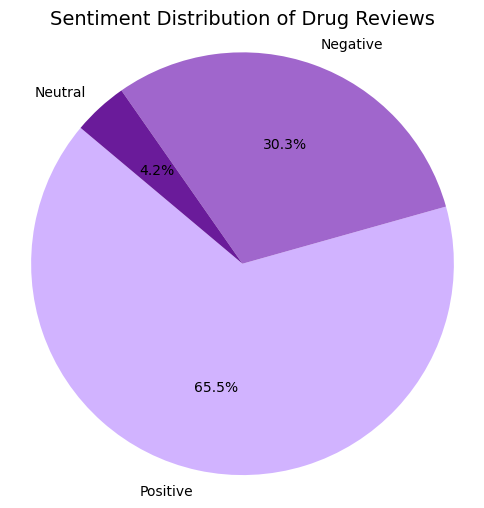

In [39]:
# Count sentiment values
sentiment_counts = df['sentiment'].value_counts()

# Define labels and colors
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['#D1B3FF', '#A066CC', '#6A1B9A'] 

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Distribution of Drug Reviews", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features
tfidf = TfidfVectorizer()  # You can adjust max_features

x = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['condition_encoded']

In [28]:
# Convert to DataFrame for better visibility
tfidf_df = pd.DataFrame(x, columns=tfidf.get_feature_names_out())

# Display first few rows
print(tfidf_df.head(5))

    aa  aaf  aampe   ab  abate  abated  abating  abdo  abdomen  abdominal  \
0  0.0  0.0    0.0  0.0    0.0     0.0      0.0   0.0      0.0        0.0   
1  0.0  0.0    0.0  0.0    0.0     0.0      0.0   0.0      0.0        0.0   
2  0.0  0.0    0.0  0.0    0.0     0.0      0.0   0.0      0.0        0.0   
3  0.0  0.0    0.0  0.0    0.0     0.0      0.0   0.0      0.0        0.0   
4  0.0  0.0    0.0  0.0    0.0     0.0      0.0   0.0      0.0        0.0   

   ...  zoplicone  zoryl  zpots  zuchiinni  zumba  zyban  zyprexa  zyprexai  \
0  ...        0.0    0.0    0.0        0.0    0.0    0.0      0.0       0.0   
1  ...        0.0    0.0    0.0        0.0    0.0    0.0      0.0       0.0   
2  ...        0.0    0.0    0.0        0.0    0.0    0.0      0.0       0.0   
3  ...        0.0    0.0    0.0        0.0    0.0    0.0      0.0       0.0   
4  ...        0.0    0.0    0.0        0.0    0.0    0.0      0.0       0.0   

   zyprexia  zzzquil  
0       0.0      0.0  
1       0.0     

In [29]:
# Choose a sample review to analyze (you can change the index)
sample_review = df['review'].iloc[0]

# Create TF-IDF vectorizer (removes stopwords, keeps top 1000 words)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform([sample_review])

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sort and display top important words in that review
important_words = tfidf_df.T.sort_values(by=0, ascending=False).head(10)
print(important_words)

                    0
improvement  0.320256
major        0.320256
affects      0.160128
pain         0.160128
moderate     0.160128
months       0.160128
normal       0.160128
noticed      0.160128
overnight    0.160128
person       0.160128


C:\Users\Admin\AppData\Local\Temp\ipykernel_12384\200206689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_words[0], y=important_words.index, palette="plasma")


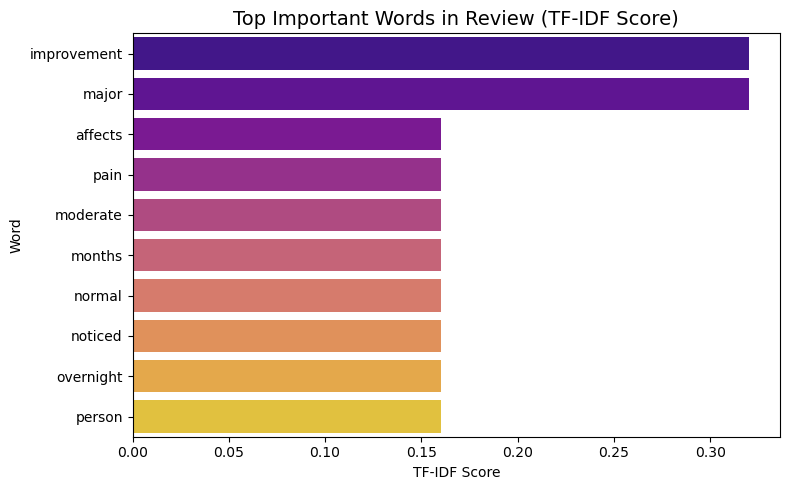

In [30]:
# Plot the top 10 important words
plt.figure(figsize=(8, 5))
sns.barplot(x=important_words[0], y=important_words.index, palette="plasma")

plt.title("Top Important Words in Review (TF-IDF Score)", fontsize=14)
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [31]:
# Train -Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Accuracy: 0.9551810684833274
                     precision    recall  f1-score   support

         Depression       0.95      0.99      0.97      1800
   Diabetes, Type 2       0.98      0.92      0.95       501
High Blood Pressure       0.95      0.85      0.90       488

           accuracy                           0.96      2789
          macro avg       0.96      0.92      0.94      2789
       weighted avg       0.96      0.96      0.95      2789



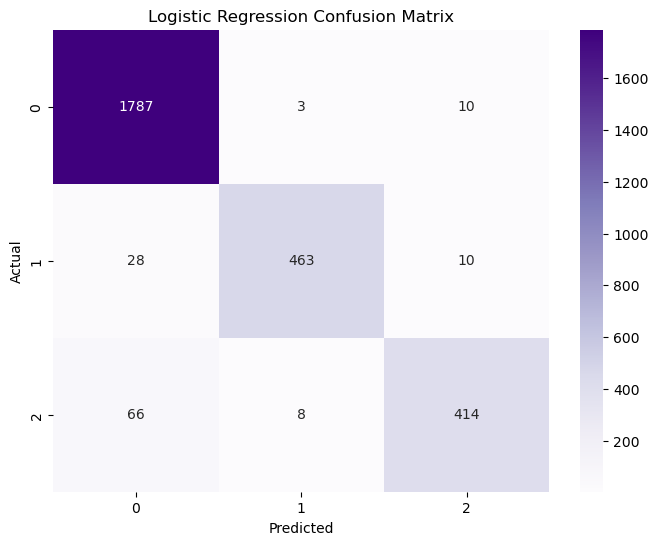

In [32]:
#Logistic Regression Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naive Bayes Accuracy: 0.855145213338114

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1800
           1       0.99      0.72      0.83       501
           2       1.00      0.46      0.63       488

    accuracy                           0.86      2789
   macro avg       0.93      0.73      0.79      2789
weighted avg       0.88      0.86      0.84      2789



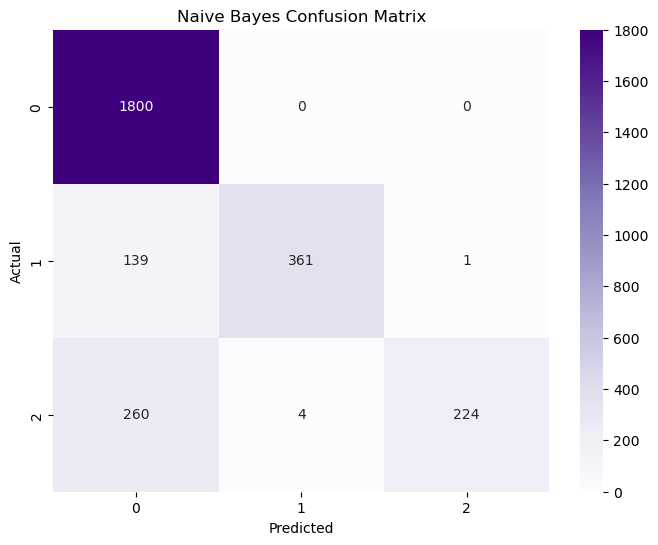

In [33]:
#Naive Bayes Model Building 
from sklearn.naive_bayes import MultinomialNB


nb = MultinomialNB()
nb.fit(x_train, y_train)


y_pred_nb = nb.predict(x_test)


print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=nb.classes_, yticklabels=nb.classes_, cmap='Purples')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Accuracy: 0.9688

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1800
           1       0.98      0.95      0.97       501
           2       0.96      0.90      0.93       488

    accuracy                           0.97      2789
   macro avg       0.97      0.95      0.96      2789
weighted avg       0.97      0.97      0.97      2789



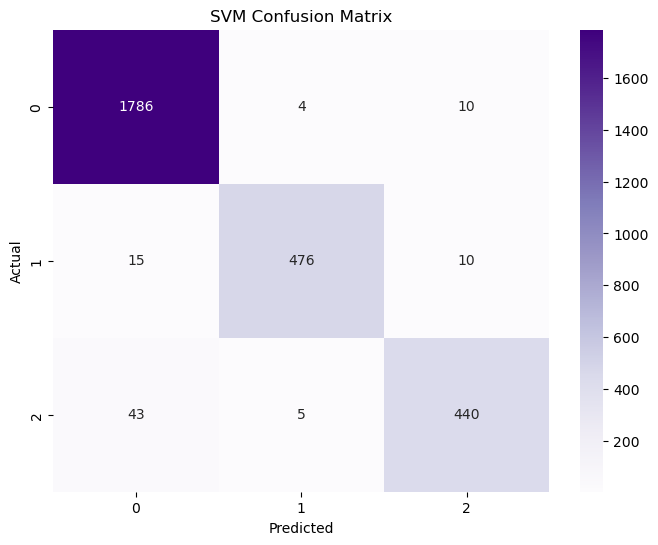

In [34]:
#SVM Model Building
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)


y_pred_svm = svm_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_, cmap='Purples')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.9530297597705271

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1800
           1       0.99      0.92      0.95       501
           2       0.98      0.84      0.90       488

    accuracy                           0.95      2789
   macro avg       0.97      0.92      0.94      2789
weighted avg       0.95      0.95      0.95      2789



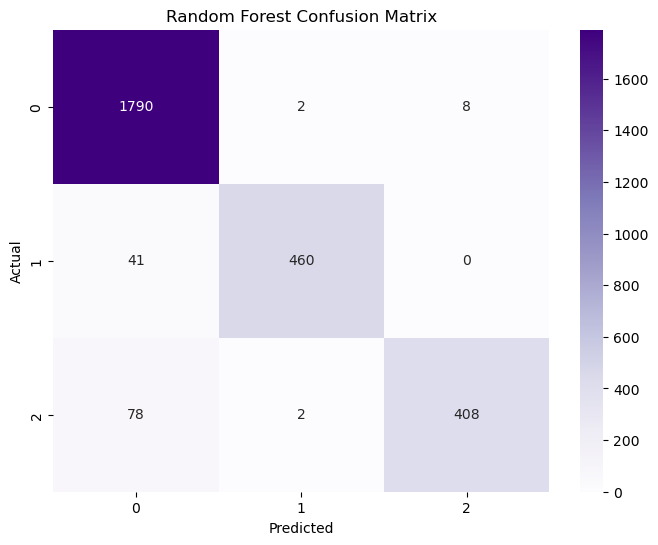

In [35]:
#Random Forest Model Building 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='Purples')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93469
[LightGBM] [Info] Number of data points in the train set: 11155, number of used features: 1998
[LightGBM] [Info] Start training from score -0.428269
[LightGBM] [Info] Start training from score -1.692586
[LightGBM] [Info] Start training from score -1.805934
LightGBM Accuracy: 0.9702402294729293

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1800
           1       0.99      0.95      0.97       501
           2       0.96      0.91      0.94       488

    accuracy                           0.97      2789
   macro avg       0.97      0.95      0.96      2789
weighted avg       0.97      0.97      0.97      2789



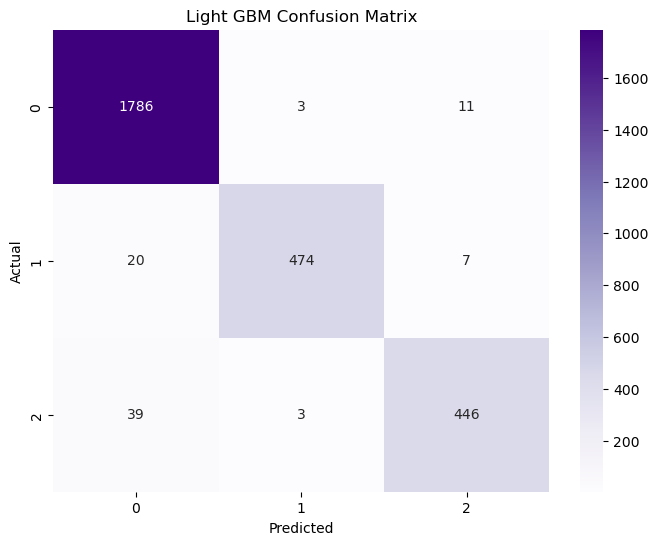

In [36]:
#Light GBM Model Building 
##!pip install lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)


print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=lgbm.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lgbm.classes_, yticklabels=lgbm.classes_, cmap='Purples')
plt.title('Light GBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [38]:
import pickle

# Define the filenames properly (no spaces in variable names)
logistic_model_file = 'logistic_model.pkl'
naive_bayes_file = 'naive_bayes_model.pkl'
svm_model_file = 'svm_model.pkl'
random_forest_file = 'random_forest_model.pkl'
lightgbm_model_file = 'lightgbm_model.pkl'
tfidf_file = 'tfidf_vectorizer.pkl'

# Save all models
pickle.dump(model, open(logistic_model_file, 'wb'))       # Logistic Regression
pickle.dump(nb, open(naive_bayes_file, 'wb'))             # Naive Bayes
pickle.dump(svm_model, open(svm_model_file, 'wb'))        # SVM
pickle.dump(rf, open(random_forest_file, 'wb'))           # Random Forest
pickle.dump(lgbm, open(lightgbm_model_file, 'wb'))        # LightGBM
pickle.dump(tfidf, open(tfidf_file, 'wb'))                # TF-IDF Vectorizer
